In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools



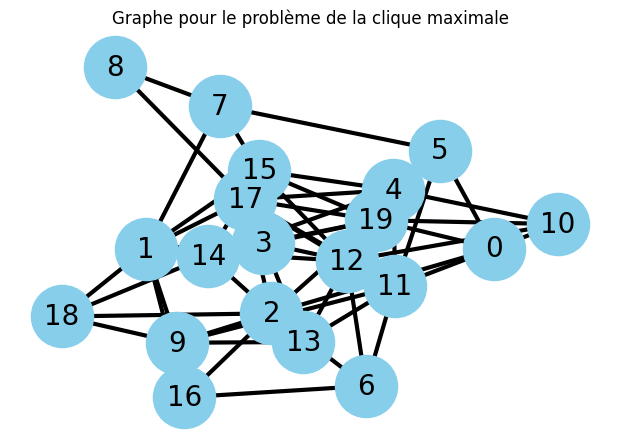

In [3]:
# Création d'un graphe
G = nx.erdos_renyi_graph(20, 0.3)

plt.figure(figsize=(6,4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=20, width=3)
plt.title("Graphe pour le problème de la clique maximale")
plt.show()

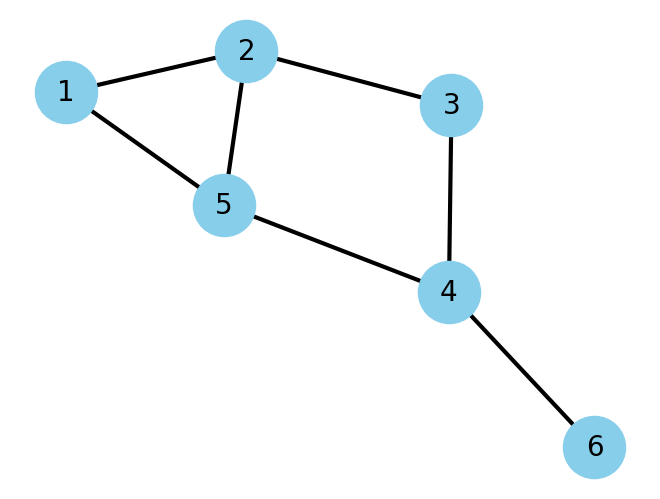

In [4]:
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_edges_from([(1, 2), (1, 5), (5, 2), (4, 5), (3, 2), (4, 3), (4, 6)])
nx.draw(G2, with_labels=True, node_size=2000, node_color='skyblue', font_size=20, width=3)

### Algo naif
Simple/naïf
```
fonction recherche_clique(graphe G):
    n = nombre de sommets de G
    taille_max_clique = 0
    clique_max = ensemble vide
    
    pour chaque sous-ensemble S de sommets de G:
        si la taille de S > taille_max_clique et est_clique(G, S):
            taille_max_clique = taille de S
            clique_max = S
            
    retourner clique_max
```



In [5]:
def is_clique(graph, set_):
    edges = graph.edges
    for n1 in set_:
        for n2 in set_:
            if (n1 == n2):
                continue
            if ((n1, n2) not in edges and (n2, n1) not in edges):
                return False

    return True


In [6]:
def recherche_clique_naif(graphe):
    n = graphe.order()
    size_max = 0
    clique_max = None
    neighbor_subgraphs = {}

    for node in graphe:
        S = set(graphe.neighbors(node))
        S.add(node)

        if len(S) > size_max and is_clique(graphe, S):
            size_max = len(S)
            clique_max = list(S)

    return clique_max
    


clique = recherche_clique_naif(G2)
print(clique)

print(list(nx.find_cliques(G2)))

[1, 2, 5]
[[2, 1, 5], [2, 3], [4, 3], [4, 5], [4, 6]]


### Bron Kerbosch

```
algorithme BronKerbosch1(R, P, X)
    si P et X sont vides alors
        déclarer que R est une clique maximale
    pour tout sommet v dans P faire
        BronKerbosch1(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}

BronKerbosch1(∅, V, ∅) //appel initial
```


In [12]:
def bron_kerbosch(R, P, X, graph, cliques):
    if not P and not X:
        cliques.append(R)
    for v in list(P):
        bron_kerbosch(R.union({v}), P.intersection(graph.neighbors(v)), X.intersection(graph.neighbors(v)), graph, cliques)
        P.remove(v)
        X.add(v)


G = nx.erdos_renyi_graph(10, 0.3) 
cliques = []
bron_kerbosch(set(), set(G.nodes()), set(), G, cliques)
print(cliques)
print(list(nx.find_cliques(G)))

[{0, 9}, {1, 9}, {1, 3}, {1, 5}, {1, 7}, {2, 3}, {2, 7}, {8, 3}, {3, 4}, {6, 7}]
[[0, 9], [1, 9], [1, 3], [1, 5], [1, 7], [2, 3], [2, 7], [4, 3], [6, 7], [8, 3]]


### Bron Kerbosch Pivot 

```
algorithme BronKerbosch2(R, P, X)
    si P et X sont vides alors
        déclarer que R est une clique maximale
    choisir un sommet pivot u dans P ⋃ X
    pour tout sommet v dans P \ N(u) faire
        BronKerbosch2(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [14]:
def bron_kerbosch_pivot(R, P, X, graph, cliques):
    if not P and not X:
        cliques.append(R)
        return  

    if P.union(X):  
        u = next(iter(P.union(X)))
        for v in P - set(graph.neighbors(u)):
            bron_kerbosch_pivot(R.union({v}),
                                P.intersection(graph.neighbors(v)),
                                X.intersection(graph.neighbors(v)),
                                graph, cliques)
            P.remove(v)
            X.add(v)

# Utilisation
cliques = []
bron_kerbosch_pivot(set(), set(G.nodes()), set(), G, cliques)
print(cliques)
print(list(nx.find_cliques(G)))

[{0, 9}, {1, 9}, {1, 3}, {1, 5}, {1, 7}, {2, 3}, {2, 7}, {8, 3}, {3, 4}, {6, 7}]
[[0, 9], [1, 9], [1, 3], [1, 5], [1, 7], [2, 3], [2, 7], [4, 3], [6, 7], [8, 3]]


### Bron Kerbosch pivot et dégénérescence

```
algorithme BronKerbosch3(G)
    P = V(G)
    R = Ø
    X = Ø
    pour tout sommet v visités dans un ordre de dégénérescence de G faire
        BronKerbosch2({v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}


Dégénérescence

Initialiser la liste de sortie L à la liste vide.
Calculer une valeur dv pour chaque sommet v de G, qui est le nombre de voisins de v qui n'est pas déjà dans L (initialement, il s'agit donc du degré des sommets dans G).
Initialiser un tableau D tel que D[i] contienne la liste des sommets v qui ne sont pas déjà dans L pour lesquels dv = i.
Initialiser la valeur k à 0.
Répéter n fois:
Parcourir les cellules du tableau D[0], D[1], ... jusqu'à trouver un i pour lequel D[i] est non-vide.
Mettre k à max(k,i).
Sélectionner un sommet v de D[i], ajouter v en tête de L et le retirer de D[i].
Pour chaque voisin w de v qui n'est pas déjà dans L, retirer une unité de dw et déplacer w de la cellule de D correspondant à la nouvelle valeur de dw.
```



In [22]:
from heapq import heappush, heappop

def degeneracy_order(graph):
    degeneracy_order = []
    degrees = {node: len(list(graph.neighbors(node))) for node in graph.nodes()}
    degree_buckets = [[] for _ in range(len(graph) + 1)]
    for node, degree in degrees.items():
        degree_buckets[degree].append(node)
    heap = []

    for i, bucket in enumerate(degree_buckets):
        if bucket:
            for node in bucket:
                heappush(heap, (i, node))

    while heap:
        degree, node = heappop(heap)
        degeneracy_order.append(node)
        for neighbor in list(graph.neighbors(node)):
            if neighbor in degrees:
                old_degree = degrees[neighbor]
                if neighbor in degree_buckets[old_degree]:
                    degree_buckets[old_degree].remove(neighbor)
                new_degree = old_degree - 1
                degrees[neighbor] = new_degree
                heappush(heap, (new_degree, neighbor))
        if node in degrees:
            del degrees[node]

    return degeneracy_order



In [26]:
def bron_kerbosch_degenerecence(graph):
    cliques = []
    order = degeneracy_order(graph)
    P = set(graph.nodes())
    R = set()
    X = set()
    
    for v in order:
        if v in P:  # Assurez-vous que v est toujours dans P
            N_v = set(graph.neighbors(v))
            bron_kerbosch_pivot({v}, P.intersection(N_v), X.intersection(N_v), graph, cliques)
            P.remove(v)
            X.add(v)
    
    return cliques


G = nx.erdos_renyi_graph(10, 0.3)
cliques = bron_kerbosch_degenerecence(G)
print(cliques)
print(list(nx.find_cliques(G)))

[{8, 4}, {0, 2}, {0, 7}, {1, 7}, {1, 5, 9}, {8, 9, 2}, {8, 3}, {3, 5}, {5, 6}, {8, 6}]
[[0, 2], [0, 7], [1, 9, 5], [1, 7], [5, 3], [5, 6], [8, 2, 9], [8, 3], [8, 4], [8, 6]]
